Chapter Three: Array-based Sequences
************************************


Section 1 Introduction: Python sequence types
---------------------------------------------

Python’s  sequence builtin classes are *list*, *tuple*, and *str*.
Each of them supports indexing in order to access an element \\(k\\) of a sequence,
using a syntax such as ``seq[k]``; they also share the low-level concept of
*array* in order to be represented. They differ in how instances of these
classes are represented internally by Python, as we will see in the rest of this chapter.

While one only needs to understand the syntax and semantics of a class’s public interface
in order to write correct code, it is important to have some insight about the
implementation of the same class to achieve a good level of efficiency of the programs.
The basic usage of lists, strings, and tuples is somehow similar,
but several details can affect the behaviour and the efficiency of the programs, if underestimated.


Section 2 Low-level arrays
--------------------------

The primary memory of a computer is composed of *bits* of information,
that are grouped into larger units in a way that depends upon the system architecture.
A typical unit is a *byte*, which is equivalent to 8 bits.
In order to keep track of the information stored into bytes, a *memory address* is used:
each byte is associated with a unique binary number that serves as its address.
Memory addresses are coordinated with the physical layout of the memory system,
and so they are shown in sequential fashion.
Despite this sequential nature, any byte of the main memory can be efficiently accessed
using its memory address; this means that, in theory, any byte of memory can be
stored or retrieved in \\(O(1)\\) time.
A computer’s main memory performs as a random access memory (RAM).

A common programming task is to keep track of a sequence of related objects;
in this case, we could use a number of different variables, or we could prefer to use a
single name for the group, and index numbers to refer to elements in that group.
This is achieved by storing the variables one after another in a contiguous
portion of the computer’s memory, and by denoting such a representation as an *array*.
For instance, the text string "STRING" is stored as an ordered sequence of six characters.
Each character is represented using the Unicode character set,
and each Unicode character is represented with 16 bits (i.e., 2 bytes).
Therefore, the six-character string will be stored in 12 consecutive bytes of memory.

figura31.png

We refer to this sequence as an array of six characters;
each location within an array is called a *cell*, and we use an integer increasing index
to describe its location within the array,
starting from 0 (for example, the cell of the previuos array with index 2 contains the character R).

Each cell of an array must use the same number of bytes.
This allows us to access an arbitrary cell of the array in constant time.
If one knows the memory address at which an array starts, the number of bytes per element ,
and a desired index within the array, the element's memory address
is *start + cellsize x index*, and this computation can be done at a low-level
of abstraction, being totally transparent to the programmer.

Section 2.1 Referential arrays
==============================

Consider an array-based structure that, for some reason, maintains the names of some colours.
For example, in Python we might use a list of names, such as:
``[ White , Blue , Yellow , Red , Black ]``.
The elements of the list are strings with different lenghts; this is in contrast with
the Python requirement that each cell of the array must use the same number of bytes.
A first solution could be to to reserve enough space for each cell to hold the string with maximum length;
this is clearly inefficient (a lot of memory is wasted),
and not general (we don't know if there will be another name longer that those that are already in the list).


figura32.png


A more efficient solution is to represent a list instance by means of an array of object references:
a consecutive sequence of memory addresses is stored, each of which referring to an element of the sequence.
Note that even if the size of the each elements may vary, the number of
bits used to store the memory address of each element is fixed ;
this allows a constant-time access to a list of elements, based on its index.

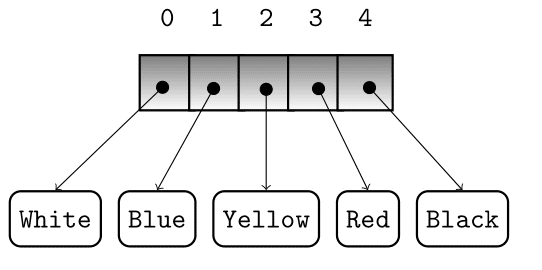

Because, in Phyton, lists are referential structures, a list instance may include multiple references
to the same object as elements of the list, or a single object can be
an element of two lists. For instance, the list ``primes=[2,3,5,7,11,13,17]``,
is a list of references to the numbers, and not a list of numbers.
The command ``temp = primes[3:6]`` returns a new list instance ``[7,11,13]``,
and this new list has references to the same elements that are in the original list.

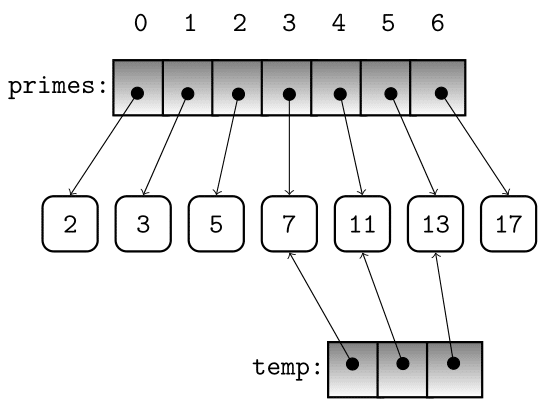

When the elements of the list are immutable objects, neither of the lists can cause a change to the shared object;
for example, the command ``temp[2] = 15`` does not change the existing integer object 13;
instead, it changes the reference in cell 2 of the ``temp`` list to a new reference to a different object.

figura35.png

The same happens when making a new list as a copy of an existing one, with the command ``backup = list(primes)``.
This produces a new list that is a *shallow copy*, in that it references the same elements
as in the first list. If the contents of the list are of a mutable type, a *deep copy* (a new list with new elements),
can be produced by using the ``deepcopy`` function from the ``copy`` module.

Section 2.2 Compact arrays
==========================

In contrast to referential arrays, *compact arrays* store the bits that represent the data
into the structure, directly.
For instance, strings are represented in Phyton as arrays of characters,
and not as arrays of references to characters.
This solution has some computational advantage over referential arrays;
a referential structure uses 64-bits for each memory address stored in the array,
plus the number of bits used to represent the actual elements.
Moreover, in a compact array the data are stored consecutively in memory,
and this is not the case for a referential structure, whose elements reside
in parts of the memory that are not consecutive; it is advantageous, for an efficient
computation, to have data stored in memory near other data that might be used in the same computations.

The primary support for creating compact arrays is in the ``array`` module.
That module defines a class ``array``, providing compact storage for arrays of primitive data types.
A compact array of prime numbers is declared as ``primes = array( i , [2, 3, 5, 7, 11, 13, 17, 19])``,
where ``i`` represents the type of data that will be stored into the array, an integer in this case.
This allows the interpreter to know the amount of bits that will be needed in order to
store the array, while the interface of the class is similar to that of a list.
The type codes supported by the array module are based on the basic data types, such as
``char`` (signed or unsigned), ``int`` (signed or unsigned), and ``float``.

Section 3 Dynamic array
-----------------------

In the previous section we have seen that in order to create a compact array,
the size of that array has to be declared.
A consecutive piece of memory will be allocated for storaging that information.
If one wants to extend the capacity of the array, in a *dynamic* way,
a first solution is to add cells to the previously defined array;
this cannot be done easily, because the neighboring memory locations could be already taken by
other pieces of information.

Consider, for instance, the Python’s ``list`` class.
A list has a given length when defined, but we are allowed to add elements to the list, indefinitely.
This is realized by implementing the list by means of a *dynamic array*; the list instance
maintains an underlying array that has greater capacity than the current length of the list.
For example, while the actual list contains six elements,
the system builds an underlying array that stores eight or more object references.
A new element can be appended to the list by using the next available cell of the array.
However, this extra capacity is not enough if the user keeps adding elements to the list.
In this case, the system must provide a larger array,
initializing the new array so that its prefix matches that of the existing smaller array.
In what follows, we show that Python’s ``list`` class is based on this strategy:

In [ ]:
import sys  # includes the function getsizeof
data = [ ]  # empty list
n = 26
for k in range(n):
    a = len(data)  # a is the number of elements
    b = sys.getsizeof(data)  # size of data in bytes
    print('Length: {:3d}; Size in bytes: {:4d}'.format(a, b))
    data.append(None)  # increase length by one

Length:   0; Size in bytes:   72
Length:   1; Size in bytes:  104
Length:   2; Size in bytes:  104
Length:   3; Size in bytes:  104
Length:   4; Size in bytes:  104
Length:   5; Size in bytes:  136
Length:   6; Size in bytes:  136
Length:   7; Size in bytes:  136
Length:   8; Size in bytes:  136
Length:   9; Size in bytes:  200
Length:  10; Size in bytes:  200
Length:  11; Size in bytes:  200
Length:  12; Size in bytes:  200
Length:  13; Size in bytes:  200
Length:  14; Size in bytes:  200
Length:  15; Size in bytes:  200
Length:  16; Size in bytes:  200
Length:  17; Size in bytes:  272
Length:  18; Size in bytes:  272
Length:  19; Size in bytes:  272
Length:  20; Size in bytes:  272
Length:  21; Size in bytes:  272
Length:  22; Size in bytes:  272
Length:  23; Size in bytes:  272
Length:  24; Size in bytes:  272
Length:  25; Size in bytes:  272


Note that an empty list already requires a number of bytes of memory (72 in this case).
This happens because each object in Python (as our list's instance) maintains some private instance variables,
such as the number of elements currently stored in the list,
the maximum number of elements that can be stored in the array,
and the reference to the currently allocated array (initially None).
As soon as the first element is inserted into the list, the number of bytes jumps
from 72 to 104, given the allocation of an array capable of storing four object references.
After the fifth element has been added to the list, the memory usage jumps
from 104 bytes to 136 bytes, meaning that the list can host up to eight object references.
After the ninth and the seventeenth insertion, the size of the list is increased again.

Because a list is a referential structure, the result of ``getsizeof`` for a list instance
only includes the size for representing its primary structure; it does not account for
memory used by the objects that are elements of the list. In our experiment, we
repeatedly append None to the list, because we do not care about the contents, but
we could append any type of object without affecting the number of bytes reported by ``getsizeof(data)``.

Section 3.1 Implementation
==========================

In this section, we introduce an implementation of a class ``DynamicArray``;
given an array *A* that stores the elements of the list, we will show how to add an element
when the maximum size of the array has been reached, using the four following steps::

 1. define a new array B, with double capacity;
 2. B[i] = A[i] (for i = 0,... n−1), with n the number of current items;
 3. A = B, , that is, use B as the array supporting the list;
 4. add the new element in the new array.

Python supports the creation of a lists with the class ``list``;
we provide an alternative implementation in the following code:

In [ ]:
import ctypes  # provides low-level arrays

class DynamicArray:

    def  __init__ (self):
        self._n = 0  # number of elements
        self._capacity = 1  # initial capacity
        self._A = self._make_array(self._capacity)  # define low-level array

    def __len__ (self):
        return self._n

    def __getitem__ (self, k):
        if not 0 <= k < self._n:
            raise IndexError('invalid index')
        return self._A[k]

    def append(self, obj):
        if self._n == self._capacity:  # full array
            self._resize(2*self._capacity)  # double capacity
        self._A[self._n] = obj
        self._n += 1

    def _resize(self, c):
        B = self._make_array(c)  # new array
        for k in range(self._n):
            B[k] = self._A[k]
        self._A = B  # A is the new array
        self._capacity = c

    def _make_array(self, c):
        return (c*ctypes.py_object)( )  # see ctypes documentation

In this code, we provide the functionality ``append``, ``__len__``, and ``__getitem__``.
We create a new low-level array using  the module ``ctypes``.

Section 3.2 Analysis of dynamic arrays
======================================

In this section, we analyze the running time of operations on dynamic arrays,
using a tecnique called *algorithmic amortization*,
in order to show that the strategy introduced before is efficient enough.

Replacing a full array with a new, larger array requires \\(\Omega(n)\\) time to perform,
with \\(n\\) the current number of elements in the array.
This happens when we try to append a new element to an array that is already full.
Once doubled the capacity of the array, we can append \\(n\\) new elements to the array,
before it needs to be be replaced again.
Thus, there are many simple append operations for each expensive one.

To show the efficiency of this strategy, we imagine that a coin has to be payed for a constant
amount of computing time. When an operation had to be executed, we must have enough coins to
pay for that operation’s running time.
The total amount of coins spent for any computation is proportional to the total time spent on that
computation. We prove the following

**Proposition:** Let \\(S\\) be a sequence implemented by means of a dynamic array
with initial capacity equal to 1, and doubling the array size when full.
The total time required to perform \\(n\\) append operations in \\(S\\) is \\(O(n)\\).

**Proof** Assume that one coin is the cost of each append operation,
and assume that doubling an array of size \\(k\\) (when needed) costs \\(k\\) coins.
The amortization tecnique allow us to overcharge some simple operations in order to pay for
others that are more expensive.
We charge each append operation three coins (two coins more than the actual cost of the operation),
when it doesn't cause an overflow of the array.
We will use the extra coins to pay for the cost of the doubling operation.
An overflow occurs when the size of the array \\(S\\) has \\(2^i\\) elements, for \\(i \geq 0\\);
doubling the size of the array requires \\(2^i\\) coins.
These coins have been saved during the previuos append operations, from the cell \\(2^{i−1}\\) to \\(2^i −1\\),
and can be used to pay for the extension of the array.
Our amortization scheme, in which each operation is charged three coins, allow us
to pay for the execution of \\(n\\) append operations using \\(3n\\) coins;
the amortized running time of each append operation is \\(O(1)\\), and
the total running time of \\(n\\) append operations is \\(O(n)\\).

Note that the key to the previous linear performance is that the space we add
when expanding the array is always proportional to the current size of the array itself;
in this case, the array's size is doubled, when needed.
We could choose to increase the size of the array by, say, 30 per cent, or 200 per cent.
If the extension of the array follows such a geometric growth,
it can be proven that the previous amortized time-bound is still valid, using a constant number
of coins for each operation.

Using an arithmetic progression instead of a geometric one results in a quadratic overall cost.
Suppose, for example, to add one cell every time the array needs to be resized; this leads to
a resizing for each append operation, and this requires \\(1+2+...+n\\) operations (that is \\(\Omega(n^2)\\).
In general, we prove the following

**Proposition** Let \\(S\\) be a sequence implemented by means of a dynamic array
with initial capacity equal to 1, and using a fixed increment with each resize.
The total time required to perform \\(n\\) append operations in \\(S\\) is \\( O(n^2) \\).

**Proof** Let \\(c > 0\\) be the fixed number of cells added to the array for each resize.
During the \\(n\\) append operations, time is required to initialize arrays of size
\\(c\\), \\(2c\\), \\(3c\\), ..., \\(mc\\),  for \\(m = n/c\\);
The overall time is proportional to  \\(c+2c+3c+ \ldots +mc\\), and this sum is \\( \Omega(n^2) \\).

Finally, the geometric increase in capacity when resizing an array shows an interesting property
for a data structure: the final array size, at the end of \\(n\\) operations, is proportional to
\\(O(n)\\). In general, any container that provides operations that cause adding or removing
one or more elements, requires a \\(O(n)\\) memory usage.
Repeated insertions and removal may cause the array to grow arbitrarily large,
with no proportional relationship between  the actual number of elements and the array capacity
after many elements are removed.
A robust implementation of such a data structure has to reduce the array,
when possible, while maintaining the constant amortized bound on individual operations.

Section 4 Performance of Python's sequence types: list, tuple, and string
-------------------------------------------------------------------------

In this section, we first consider the behaviour of Python's tuples and *non mutating* lists;
then, we analyze what happens with *mutating* lists.

Section 4.1 Python’s non mutating List and Tuple Classes
========================================================

The non mutating methods of the ``list`` class and those of the ``tuple`` class are the same.
Tuples and immutable lists have the same efficiency, because there is no need for an underlying
dynamic array. In what follows we summarize the cost of some operations on instances of these classes.

**Constant-Time Operations** The length of a list or tuple instance ``len(data)`` is returned in
constant time, because each instance explicitly maintains such information.
The direct access to an element ``data[j]`` requires constant time, because of the underlying access into an array.

**Searching for Occurrences of a Value**
``data.count(value)``, ``data.index(value)``, and ``value in data`` requires iterations
on the sequence from left to right.
Note that the iteration for ``count`` must proceed through the entire sequence of length \\(n\\),
implying that its time-complexity is \\(O(n)\\).
The other two methods can stop the iteration as soon as the index is found, or the containment
is verified, respectively, meaning that the complexity is \\(O(k)\\), with \\(k\\) the index
of the leftmost occurrences of ``value``.

**Sequence Comparisons**
Comparisons between two sequences are defined lexicographically.
This requires, in the worst case, an iteration taking time proportional to the length of the shorter
of the two sequences, thus \\(O(n)\\).

**Creating New Instances**
The running time of operations like slicing a sequence ``data[a:b]``
or concatenating two sequences ``data1+data2`` is proportional to the length of the result.

Section 4.2 Python’s mutating List
==================================

The simplest mutating operation on lists is ``data[j] = val``, with the obvious sematics.
It is supported by the ``__setitem__`` method, with a worst-case time complexity \\(O(1)\\),
because it simply replaces one element of a list with a new one.
In what follows we show the complexity of those methods that add or remove elements from a list.

**Adding Elements to a List**
The ``append`` method requires \\(\Omega(n)\\), in the worst case, when a resizing of the array is needed.
In the amortized complexity scheme, it uses \\(O(1)\\) time.
Another method supported by the ``list`` class is ``insert(k, value)``, that inserts
a given ``value`` into the list at index ``k``, while shifting all subsequent elements to the right.
An implementation of this method is:

In [ ]:
def insert(self, k, value):

    if self._n == self._capacity:  # not enough room, resize the array
        self._resize(2 * self._capacity)
    for j in range(self._n, k, -1):  # shift to right, rightmost first
        self._A[j] = self._A[j-1]
    self._A[k] = value
    self._n += 1

Note that adding one element may require resizing the array.
This costs linear time in the worst-case, but costs \\(O(1)\\) amortized time.
Shifting \\(k\\) elements to make room for the new item costs an amortized \\(O(n−k+1)\\) time.
When evaluating the average time per operation, we see that inserting
at the beginning of a list is most expensive, requiring linear time per operation;
inserting at the middle requires about half the time as inserting at the beginning,
yet is still linear time; inserting at the end requires constant time.

**Removing Elements from a List**
The easiest way to remove an element from an instance of a Python’s ``list`` class is
with the method ``pop()``, that removes the last element from a list;
its execution requires \\(O(1)\\) amortized **Removing Elements from a List**
The easiest way to remove an element from an instance of a Python’s ``list`` class is
with the method ``pop()``, that removes the last element from a list;
its execution requires \\(O(1)\\) amortized time, given that all elements remains in the
original cell of the underlying dynamic array, with the exception of the occasional shrinking of the array itself.
The method ``pop(k)`` removes the \\(k\\)-th element of the list, and shifts all subsequent elements leftward;
this requires a \\(O(n−k)\\) complexity

The method ``remove(value)`` removes the first occurrence of ``value`` from the list;
it requires a complete scan of the list, first to search for the value,
and then to shift all other elements to the left:time, given that all elements remains in the
original cell of the underlying dynamic array, with the exception of the occasional shrinking of the array itself.
The method ``pop(k)`` removes the \\(k\\)-th element of the list, and shifts all subsequent elements leftward;
this requires a \\(O(n−k)\\) complexity

The method ``remove(value)`` removes the first occurrence of ``value`` from the list;
it requires a complete scan of the list, first to search for the value,
and then to shift all other elements to the left:

In [ ]:
def remove(self, value):
    for k in range(self._n):
        if self._A[k] == value:
            for j in range(k, self._n-1):
                self._A[j] = self._A[j+1]
            self._A[self._n-1] = None
            self._n -= 1
            return  # exit immediately
    raise ValueError('value not found')

**Extending a List**
The method ``extend`` is used to add all elements of one list to the end of a second list,
with the call ``first.extend(second)``. The running time is proportional to the length of
the ``second`` list, and it is amortized because the array representing ``first`` may be resized.

**Constructing New Lists**
Python offers several way to construct new lists.
In almost all cases, the time requirement is linear in the length of the list that is created.
For instance, it is common to create a list using the multiplication operator,
as in ``[0]*n``, that creates a list of length ``n`` with all values 0.


Section 5 Some algorithms on Python’s strings
---------------------------------------------

In this section, we analyze the behaviour of some methods and some well known algorithms on strings.
Let \\(n\\) and \\(m\\) denote the length of strings. It seems natural to evaluate as
linear (in the length of the string) the complexity of those methods that produce a new string.
Also, methods testing boolean conditions of a string, or comparison operators, take \\(O(n)\\) time,
because they have to check all \\(n\\) characters in the worst case, and short circuit as soon as the answer is found
(e.g., ``islower`` returns False if the first character is uppercased); the same happens for
comparison operators, such as ``==`` or ``<=``.

Section 5.1 Pattern Matching
============================

In the classic pattern-matching problem, we are given a text string \\(T\\) of length \\(n\\)
and a pattern string \\(P\\) of length \\(m\\), and want to find whether \\(P\\) is a substring of \\(T\\).
The solutions to this problem show some interesting behaviors, from an algorithmic point of view.
A brute-force implementation runs in \\(O(mn)\\) time,
because it considers the \\(n−m+1\\) possible starting indices for the pattern,
and spends \\(O(m)\\) time at each starting position, checking if the pattern matches.
More refined solutions runs in \\(O(n)\\) time.

The formal solution of the problem consists in finding the lowest index \\(j\\) within \\(T\\)
at which \\(P\\) begins, such that \\(T[j:j+m]\\) equals \\(P\\).
The pattern-matching problem is related to many behaviors of Python’s
``str`` class, such as ``in``, ``find``, ``index``, ``count``,
and is a subtask of other methods such as ``partition``, ``split``, and ``replace``.

**First solution: Brute Force**

In general, the brute-force design consists in enumerating all possible configurations of the inputs
involved and select the best of all, occording to some kind of measure.
One can easily imagine that enumerating and searching implies a non-optimal time consumption.
Thus, we search for all possible placements of \\(P\\) in \\(T\\),
returning the lowest index of \\(T\\) at which substring \\(P\\) begins (or else -1), as follows:

In [ ]:
def find_brute(T, P):
    n, m = len(T), len(P)
    for i in range(n-m+1):
        k = 0
        while k < m and T[i + k] == P[k]:
            k += 1
        if k == m:  # we reached the end of P,
            return i  # substring T[i:i+m] matches P
    return -1  # no match

The previous algoritm consists of two nested loops: the outer loop indexing through all possible
starting indices of the pattern in the text \\(T\\); the inner loop indexing through each
character of the pattern \\(P\\), comparing it to the corresponding character in the text.
This implies that for each candidate index in T, we perform up to \\(m\\) character
comparisons; hence, in the worst case, we perform \\(O(mn)\\) operations.

**Second solution: The Boyer-Moore Algorithm**

The Boyer-Moore pattern-matching algorithm avoids comparisons between \\(P\\) and a part of
the characters in \\(T\\). This means that we don't need, as in the brute-force approach,
to scan each character of \\(T\\) in order to find the match.

Two considerations allow us to write this algorithm: the *looking-glass heuristic* and
the *character-jump heuristic*. With the former, we begin the comparison from the end
of \\(P\\), moving backwards to the front; if we encounter a
mismatch at a certain location in T, we can avoid all the remaining comparisons by
shifting \\(P\\) relative to \\(T\\) using the character-jump heuristic.
In fact, if the mismatch happens between the text character \\(T[i]=c\\) and
the pattern character \\(P[k]\\), we have two cases: if \\(c\\) does not belongs to \\(P\\),
then we shift \\(P\\) completely past \\(T[i]\\); otherwise,
we shift \\(P\\) until an occurrence of character \\(c\\) in P gets aligned with T[i].
In both cases, a number of comparisons is not executed.

More precisely, suppose that a match is found for that last character of \\(P\\):
the algorithm tries to find a match for the second-to-last character of the pattern, and so on,
until either a full match is found, or a mismatch at some position of the pattern shows up.
Again, if a mismatch is found, and the mismatched character of the text does not occur
in the pattern, we shift the entire pattern beyond that location.
If the mismatched character occurs elsewhere in the pattern,
we must consider two possible subcases depending on whether its last occurrence
is (1) before or (2) after the character of the pattern that was aligned with the mismatched character.

Let \\(i\\) represent the index of the mismatched character in the text,
\\(k\\) represent the corresponding index in the pattern,
and \\(j\\) represent the index of the last occurrence of \\(T[i]\\) within the pattern.
If (1) \\(j < k\\), we shift the pattern by \\( k− j\\) units,
and thus, index \\(i\\) is increased by \\(m−(j +1)\\);
if (2) \\(j > k\\), we shift the pattern by one unit,
and index \\(i\\) is increased by \\(m−k\\).
In what follows, we introduce the Python implementation of the algorithm:

In [ ]:
def boyer_moore(T, P):
    '''returns the index of the character in T where P begins, if it exists'''
    n, m = len(T), len(P)
    if m == 0: return 0
    last = {}  # build ’last’ dictionary
    for k in range(m):
        last[P[k]] = k  # later occurrence overwrites

    i = m-1  # index of T
    k = m-1  # index of P
    while i < n:
        if T[i] == P[k]:  # match
            if k == 0:
                return i  # the pattern begins at index i of text
            else:
                i -= 1
                k -= 1
        else:  #no match
            j = last.get(T[i], -1)  # last(T[i]) is -1 if not found
            i += m - min(k, j + 1)  # case analysis for jump step
            k = m - 1  # restart at the end of pattern
    return -1

The efficiency of the algorithm relies on the ability to create a function ``last(c)``
that returns the index of the rightmost occurrence of \\(c\\) in \\(P\\) (-1, if \\(c\\) is not in \\(P\\)).
If the alphabet is of finite size, and the characters can be used as indices of an array,
``last(c)`` can be implemented as a lookup table with constant-time cost,
containing the characters of the pattern.
The worst-case running time of the Boyer-Moore algorithm is \\(O(nm+|\Sigma|)\\).
The ``last`` function uses time \\(O(m+|\Sigma|)\\),
and the search for the pattern takes \\(O(nm)\\) time in the worst case,
the same as the previous brute-force algorithm.
The Boyer-Moore algorithm is able to skip large portions
of text, and experimental evidence shows that the average number of
comparisons done per character is one quarter of those used with a brute-force algorithm.

More refined heuristics achieve running time \\(O(n+m+|Σ|)\\),
as for instance in the Knuth-Morris-Pratt pattern-matching algorithm.

Section 5.2 Composing Strings
=============================

Assume that we have a string named ``document``, and that we want to create a string ``letters``
containing the alphabetic characters of the original string.
A first solution is:



```
letters = ''
for c in document:
    if c.isalpha():
        letters += c
```

For each character in the document, we add it to ``letters`` only if it is alphabetic.
Even if the solution appears to be quite natural, it is highly inefficient.
A string is immutable, meaning that every time we add a letter, we have to extend the list;
we have seen before that this requires time that is proportional to the length of the list.
For a final result with \\(n\\) characters,
the series of concatenations would take time proportional to \\(1+2+3+ \ldots +n\\),
that is \\(O(n^2)\\) time.
The reason why the command ``letters += c`` is inefficient, is because a new
string instance has to be created (the original string must be left unchanged if
another variable in a program refers to that string).
But if there are no other references to the string, the command could be implemented more efficiently,
by using a dynamic array, for instance. We can detect if there are no other
references to the string by checking the *reference counter*, a number that is mantained for each object.

Another solution consists in building a temporary list to store individual pieces,
and then using the ``join`` method of the ``str`` class to compose the final result:

    temp = [ ]
    for c in document:
    if c.isalpha( ):
        temp.append(c)
    letters = ''.join(temp)

The calls to ``append`` require \\(O(n)\\) time, because there at most \\(n\\) calls,
and each call costs an amortized \\(O(1)\\) time.
The call to ``join`` costs linear time in the length of ``temp``.

Section 5.3 Selection Sort
==========================

For an array-based sequence, the *selection sort* algorithm compares the first and the second elements in the array.
If the second is smaller than the first, it swaps them.
Next, it consider the third element in the array, swapping it leftwards until it is in its proper order
with the first two elements.
Then, it considers the fourth element, and swaps it leftwards until it is in the proper order with
the first three.
This process continues until the array is sorted::

    Algorithm InsertionSort(A):
        Input: an array A of n elements
        Output: the array A with elements rearranged in nondecreasing order
            for k from 1 to n − 1 do
                Insert A[k] at proper location within A[0], A[1], . . ., A[k].

The Python implementation of insertion-sort uses an outer loop over each element,
and an inner loop that places an element to its proper location into the
array of elements that are to its left:

In [ ]:
def insertion_sort(A):
    for k in range(1, len(A)):
        cur = A[k]
        j = k
        while j > 0 and A[j-1] > cur:
            A[j] = A[j-1]
            j -= 1
        A[j] = cur

The worst-case running time is \\(O(n^2)\\), but if the array is nearly sorted or perfectly sorted
the algorithms runs in \\(O(n)\\) time.